In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
# Dane:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# "Ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."
# diabetes = datasets.load_diabetes()
# data = diabetes.data # nalezy je przekształcić do pandasowego dataframe'u
data = pd.read_csv('diabetes.xls')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
## Atrybuty + Zmienna modelowana
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [4]:
data.shape

(442, 11)

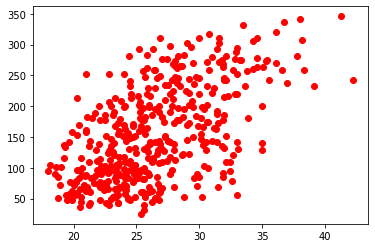

In [5]:
plt.scatter(data.BMI, data.Y,  color='red') # żeby dodac kolejne zmienne(kolumny) do tego samego 
# wykresu, trzeba powtórzyć kod zmieniając wybrana kolumnę, oraz kolor

In [6]:
# pierwszy sposób na określenie korelacji (w tym przypadku, korelacja Perasona - najpopularniejsza, najdokładniejsza)
np.corrcoef(data.AGE, data.Y) #numpy

array([[1.        , 0.18788875],
       [0.18788875, 1.        ]])

In [7]:
# drugi sposób na okreslenie korelacji Pearsona - w tym przypadku po podaniu kolumny (Series)
# można wskazać inną metodę: 'kendall' lub 'spearman'
data.AGE.corr(data.Y) # pandas 

0.18788875071891978

In [8]:
# sprawdzenie korelacji pomiędzy wszystkimi zmiennymi w dataset
corr = data.corr()
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

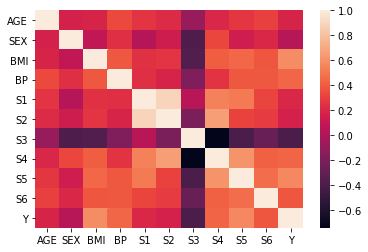

In [9]:
# wizualizacja korelacji wszytskich zmiennych (powyżej) za pomocą wykresu 'heatmap'
import seaborn as sns
sns.heatmap(corr,
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

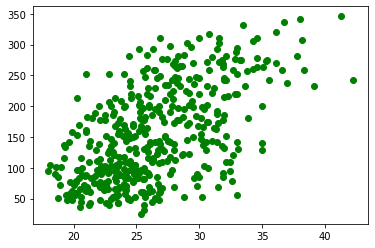

In [10]:
plt.scatter(data.BMI, data.Y,  color='green')

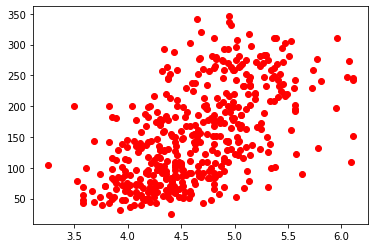

In [11]:
plt.scatter(data.S5, data.Y,  color='red')

In [12]:
# sprawdza czy cokolwiek jest puste
data.isnull().values.any()

False

In [13]:
# gdyby było (powyżej "True")
# podsumowujemy w których kolumnach sa nulle (ile wierszy w danej kolmnie jest pusta)
data.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

In [14]:
# wyswietla numer wiersza gdzie dana jest pusta - w tym przypadku puste pole było w kolumnie 'S6'
print(data[data["S6"].isnull()]['S6'])

Series([], Name: S6, dtype: int64)


In [15]:
dataset = data.iloc[:, :-1] # wyodrebniamy zmienne objaśniające bez targetu
# iloc[rows, columns] - wybiera wiersze i kolumny - ': oznacza kopiowanie'
# loc[row] - wybiera tylko wiersze

In [16]:
dataset

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [17]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI']], data.Y, test_size=0.2, random_state=0)
#  przy'BMI' bez podwójnych [] pojawia się bład przy model.fit - DLACZEGO????? 
# [[]] przy BMI to okreslenie: wewnętrzny to wyznaczenie ciągu znaków a zewnętrzny index
# w tym przypadku zwraca mini 'dataframe' co jest konieczne dla metody .fit() - wymaga listy próbek i listy cech 

In [18]:
# 1. Tworzymy obiekt modelu
model = LinearRegression()

In [19]:
# 2. Trenujemy model na danych treningowych
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2  - miara dopasowania modelu, t.j:
# aki procent jednej zmiennej wyjaśnia zmienność drugiej zmiennej. Przyjmuje on wartości od 0 do 1.
model.score(X_test, y_test)

0.19057346847560142

In [21]:
model.coef_ # Podejrzyjmy współczynniki modelu - to jest mnożnik (b1) we wzorze y = b0 + b1x1

array([10.58040081])

In [22]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
# coeff = list(model.coef_)
# labels = list(X_train.columns)
# features = pd.DataFrame()
# features['Features'] = labels
# features['importance'] = coeff
# features.sort_values(by=['importance'], ascending=True, inplace=True)
# features['positive'] = features['importance'] > 0
# features.set_index('Features', inplace=True)
# features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
# plt.xlabel('Importance')

In [23]:
model.intercept_ # Punkt przecięcia prostej (lini trendu) z osią Y

-126.77820035769682

In [24]:
predykcje = model.predict(X_test) # stosuje model do zmiennych w próbce testowej
# żeby zaokrąglic wynik, 'round' dajemy na końcu:
# predykcje = model.predict(X_test).round(2) 

In [25]:
predykcje

array([255.17426905, 211.79462571, 161.0087018 , 129.26749936,
       196.98206457, 247.76798848, 123.97729895, 174.76322286,
       205.44638522, 198.04010465,  95.41021675, 198.04010465,
       115.5129783 , 107.04865765, 239.30366783, 130.32553944,
        94.35217667, 101.75845724,  70.01725479, 191.69186416,
       180.05342327, 163.12478196, 128.20945928, 209.67854555,
       206.5044253 , 169.47302245, 111.28081797, 108.10669773,
       156.77654147, 177.9373431 , 149.3702609 , 100.70041716,
       141.96398033, 140.90594025, 146.19614066, 172.6471427 ,
       136.67377993, 143.02202042, 153.60242123, 185.34362367,
        88.00393618, 141.96398033, 145.13810058, 148.31222082,
       182.16950343,  92.23609651, 133.49965968, 176.87930302,
       119.74513862, 185.34362367, 130.32553944, 105.99061756,
       170.53106253, 144.0800605 , 194.86598441, 134.55769976,
       182.16950343, 148.31222082, 147.25418074, 164.18282204,
       192.74990424, 175.82126294, 201.2142249 , 131.38

In [26]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))
# bład średnikwadratowy czyli średnia z kwadratu błedu, tj. kwadratu róznicy pomiedzy
# wartościa prognozowana a wartością otrzymaną
# im niższa tym lepsza - przy porównaniu modeli

Mean squared error: 4150.68


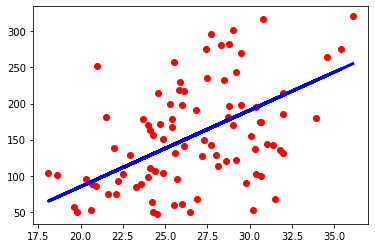

In [27]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predykcje, color='blue', linewidth=3)
plt.show()

In [28]:
# kolejny przykład, do zmiennych dodajemy 'S5' i 'S4'
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BMI', 'S5', 'S4']], data.Y, test_size=0.2, random_state=0)

In [29]:
# 1. Tworzymy obiekt modelu
model1 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model1.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model1.score(X_test, y_test)

0.2855703139021728

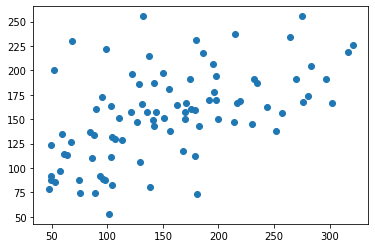

In [30]:
predykcje_1= model1.predict(X_test)
plt.scatter(y_test, predykcje_1)

In [31]:
predykcje_1

array([226.26430979, 237.34151018, 147.25758011, 112.90821438,
       160.74668369, 255.51539381, 111.78855971, 191.15977882,
       143.17239738, 221.69050456, 137.50032035, 191.66118768,
       105.8522908 ,  87.64352291, 234.31905107,  91.65243596,
       110.47105759,  73.87597152,  52.84066198, 180.64116056,
       150.65832748, 167.63411217, 150.89008534, 157.62941938,
       230.29343028, 186.07938029, 111.49176876,  91.64222939,
       170.08722215, 177.48842451, 166.50523569,  73.1339379 ,
       117.378669  , 150.08744235, 168.89180931, 174.09407894,
       151.30582234, 155.92963529, 123.84585243, 194.23644526,
        88.31181717, 158.89921272, 172.700856  , 169.28549366,
       162.79351041,  74.43335243, 147.29044546, 142.69441562,
       136.37112982, 190.95990044, 138.2006619 ,  80.06116881,
       128.36355633, 165.92377707, 206.9211082 , 166.86770796,
       196.47518349, 114.59146983, 145.05093343, 187.34103662,
       200.5743636 , 156.91118263, 157.73680028, 129.57

In [32]:
# i trzeci przykład - cały dataset (bez kolumny 'Y') jako zmienn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)

In [33]:
# 1. Tworzymy obiekt modelu
model2 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model2.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model2.score(X_test, y_test)

0.33223321731061795

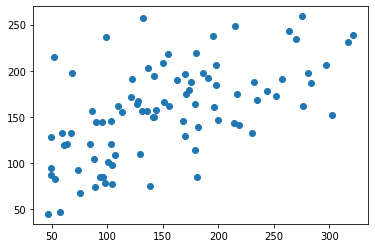

In [34]:
predykcje_2 = model2.predict(X_test)
plt.scatter(y_test, predykcje_2)

In [35]:
print(pd.DataFrame())

Empty DataFrame
Columns: []
Index: []


In [36]:
list(X_train.columns)

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

Text(0.5, 0, 'Importance')

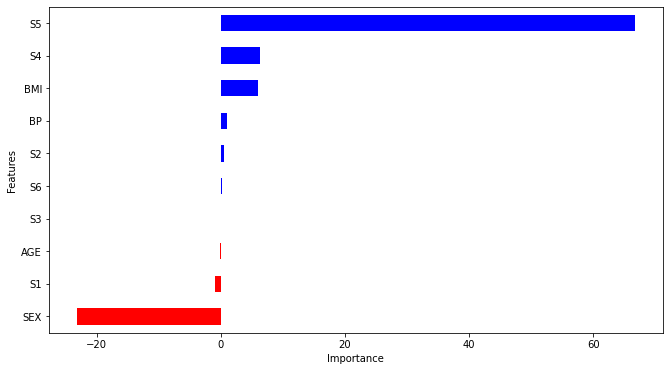

In [37]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model2.coef_)
labels = list(X_train.columns)

features = pd.DataFrame() #tworzymy nowy DataFrame 'features'
features['Features'] = labels #kolumna "Features" z nowego DataFrame ma wartości z 'labels' czyli nazwy kolumn X_train
features['importance'] = coeff #kolumna 'importance' nowego DF ma wartości wskaźników dla każdej zmiennej
features.sort_values(by=['importance'], ascending=True, inplace=True) #zwykłe sortowanie
features['positive'] = features['importance'] > 0 #kolumna 'positive' nowego DF ma wartości z 'importance', które sa większe niż 0
features.set_index('Features', inplace=True) # nadajemy index kolumnie 'features' nowego DF
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'})) #tworzymy wykres na podstawie 'importance' z nowego DF
plt.xlabel('Importance')